# BASIC CONFIGURATIONS

In [1]:
### Setup the library ###
import pyrogue as pr
import os, sys
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np
import math
import pprint
import inspect 
top_level=f'{os.getcwd()}/../'
rootTopLevel = top_level+'script/'
pr.addLibraryPath( rootTopLevel )

import setupLibPaths

import ePix320kM as devBoard

args = None

In [2]:
# ONLY RUN ONCE!
# Defining root
# If crashes, make sure the deve is correct.
root =  devBoard.Root(   
        top_level  = top_level,
        dev        = '/dev/datadev_0',
        pollEn     = False,
        initRead   = True,
        pciePgpEn  = True,
        justCtrl   = False,
        DDebugSize = 4000)
root.start()

# example showing a read
AxiVersion = root.Core.AxiVersion
print ( '###################################################')
print ( '#             Firmware Version                    #')
print ( '###################################################')
AxiVersion.printStatus()
print ( '###################################################')

Root.Core.Si5345Pll.Page0.DataBlock.setPollInterval(1)
Start: Started zmqServer on ports 9099-9101
    To start a gui: python -m pyrogue gui --server='localhost:9099'
    To use a virtual client: client = pyrogue.interfaces.VirtualClient(addr='localhost', port=9099)
Root.Core.AxiVersion count reset called
Root.pciePgp.AxiPcieCore.AxiVersion count reset called
###################################################
#             Firmware Version                    #
###################################################
Path         = Root.Core.AxiVersion
FwVersion    = 0x1011000
UpTime       = 1:36:41
GitHash      = 0xc4b12528b5966fb814b6434dc12007efdba9fa6c
XilinxDnaId  = 0x4002000001608a0624908185
FwTarget     = ePixHRM320k
BuildEnv     = Vivado v2023.1
BuildServer  = rdsrv314 (Ubuntu 20.04.6 LTS)
BuildDate    = Fri 04 Oct 2024 08:05:59 AM PDT
Builder      = dnajjar
###################################################


In [5]:
#Run this from a teminal in your localhost without the (!). If you run it here, it will open on rdsrv314 Jupyter server terminal and you won't see it.
#!python -m pyrogue gui --server='localhost:9099'

In [3]:
# Configure clock to 168 MHz and configures all ASICS
root.InitASIC([4,1,1,1,1])

Rysync ASIC started
Did not find SspMonGrp_carrier file. Using generic.
Did not find SspMonGrp_carrier file. Using generic.
Did not find specific ASIC1 file. Using generic.
Did not find specific ASIC2 file. Using generic.
Did not find specific ASIC3 file. Using generic.
Did not find specific ASIC4 file. Using generic.
Init ASIC script started
Loading PLL configuration
Loading supply configuration
Loading /home/dnajjar/epix-hr-m-320k-ila-bad-lanes/software/notebook/..//config/ePixHRM320k_PowerSupply_Enable.yml
Loading lane delay configurations
Loading /home/dnajjar/epix-hr-m-320k-ila-bad-lanes/software/notebook/..//config/ePixHRM320k_SspMonGrp_carrier.yml
Loading waveforms configuration
Loading /home/dnajjar/epix-hr-m-320k-ila-bad-lanes/software/notebook/..//config/ePixHRM320k_RegisterControl.yml
Loading batcher configurations
Loading /home/dnajjar/epix-hr-m-320k-ila-bad-lanes/software/notebook/..//config/ePixHRM320k_BatcherEventBuilder.yml
Loading packet register configurations
Loading

In [4]:
run helperFunctions.ipynb

# FPGA Charge Injection

In [22]:
ASIC=2
DEBUG=DEBUG2

pulserStep = 1
firstCol = 100
lastCol = 150


In [23]:
# Perform descrambled acquisition using debug class without writing to file. Has awesome descrambling performance
root.enableAllAsics(False)
root.enableAsic(ASIC, True)
DEBUG.enableDataDebug(True)
DEBUG.cleanData()

CE = APP.FPGAChargeInjection

CE.startCol = firstCol
CE.endCol = lastCol
CE.step = pulserStep
CE.currentAsic = ASIC

CE.Start()

frames = int(1024 / pulserStep)

# Although the triggers above may have finished, descrambling takes time
while ( frames > DEBUG.getData().shape[2]) :
    time.sleep(1)
    print("Descrambled {}".format(DEBUG.getData().shape[2]), end='\r')
print("Data Descrambled")
print(DEBUG.getData().shape)

Data Descrambled
(192, 384, 1024)


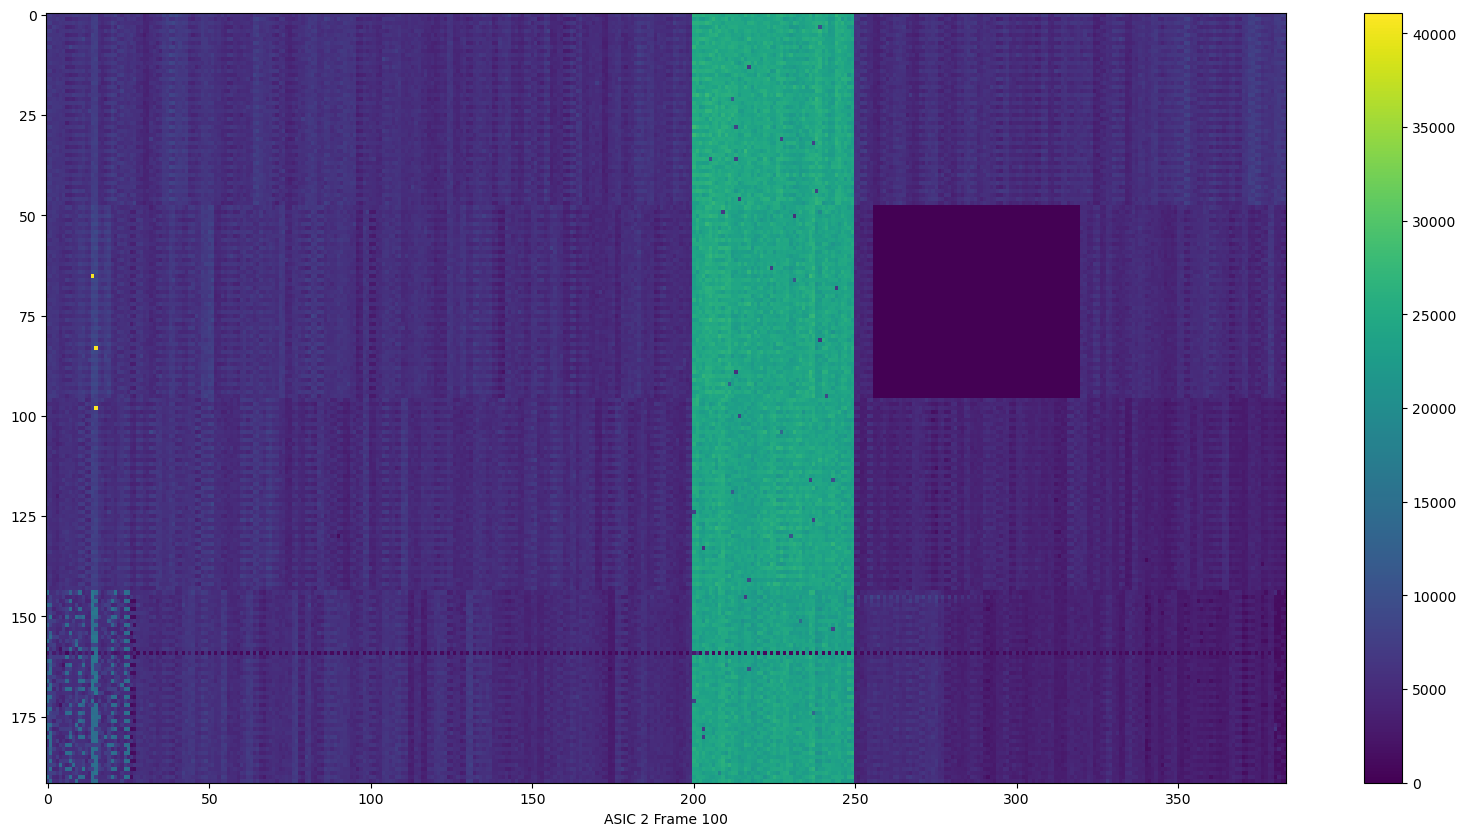

In [24]:
#Display image. Note that Interpolation is enabled. That is similar to auto contrast
plt.figure(figsize = (20,10))
plt.imshow(DEBUG.getData()[:,:,int(frames/2)], interpolation='nearest', aspect='auto')
plt.xlabel("ASIC {} Frame 100".format(ASIC))
plt.colorbar()

In [11]:
# Disable data debug so it does not store data infinitely and crash software
DEBUG.cleanData()
print(DEBUG.getData().shape)
DEBUG.enableDataDebug(False)

(192, 384, 0)
